# Testando quais variáveis são as mais importantes com os dados ** normalizados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_fam_escolaridade = pd.read_csv('./df_fam_escolaridade.csv')

In [3]:
df_fam_escolaridade.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'vlr_renda_media_fam', 'cod_local_domic_fam', 'cod_especie_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
       'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam',
       'cod_calcamento_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'peso.fam', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_nunca_freq_escola', 'pct_freq_creche',
       'adultos_nunca_freq_escola', 'pct_freq_escola_municipio',
       'ideb_2017_municipio', 'ideb_ausente'],
      dtype='object')

In [4]:
df_fam_escolaridade = df_fam_escolaridade.drop(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf',
       'vlr_renda_media_fam', 'cod_local_domic_fam', 'cod_especie_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
       'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam',
       'cod_calcamento_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'peso.fam', 'dias_cadastramento', 'dias_atualizacao'], axis=1)

In [5]:
df_fam_escolaridade.columns

Index(['id_familia', 'classe_renda', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_nunca_freq_escola', 'pct_freq_creche', 'adultos_nunca_freq_escola',
       'pct_freq_escola_municipio', 'ideb_2017_municipio', 'ideb_ausente'],
      dtype='object')

In [6]:
df_fam_escolaridade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96502 entries, 0 to 96501
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_familia                 96502 non-null  int64  
 1   classe_renda               96502 non-null  float64
 2   pct_nao_alfabetizados      96502 non-null  float64
 3   pct_n_freq_escola          96502 non-null  float64
 4   pct_freq_publica           96502 non-null  float64
 5   pct_freq_particular        96502 non-null  float64
 6   pct_nunca_freq_escola      96502 non-null  float64
 7   pct_freq_creche            96502 non-null  float64
 8   adultos_nunca_freq_escola  96502 non-null  float64
 9   pct_freq_escola_municipio  96502 non-null  float64
 10  ideb_2017_municipio        96502 non-null  float64
 11  ideb_ausente               96502 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 8.8 MB


In [7]:
df_escolaridade_cols = df_fam_escolaridade[['pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_nunca_freq_escola', 'pct_freq_creche', 'adultos_nunca_freq_escola',
       'pct_freq_escola_municipio', 'ideb_2017_municipio', 'ideb_ausente']]

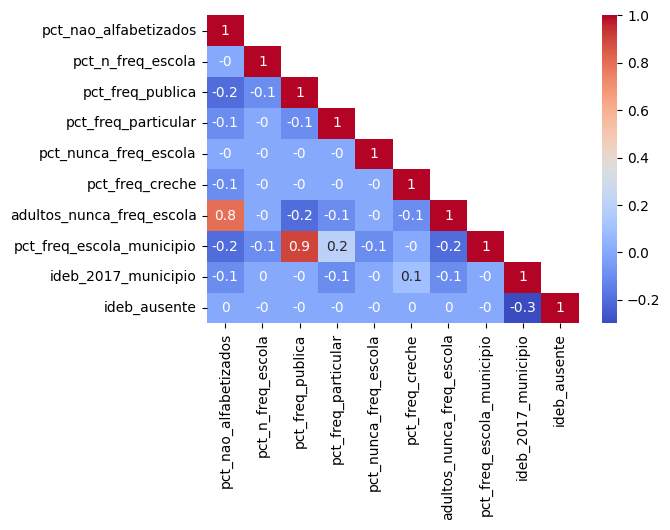

In [8]:
mask = np.triu(np.ones_like(df_escolaridade_cols.corr(), dtype=bool), k=1)

plt.figure(figsize=(6,4))
sns.heatmap(df_escolaridade_cols.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
df_fam_escolaridade['pct_freq_particular'].value_counts()

pct_freq_particular
0.000000    92776
0.333333     1236
0.500000     1141
0.250000      756
0.200000      213
0.666667      190
0.400000       53
0.166667       51
1.000000       21
0.750000       19
0.142857       17
0.600000       10
0.125000        9
0.285714        6
0.111111        3
0.800000        1
Name: count, dtype: int64

In [10]:
#Retirando features com correlação > 0.8
df_fam_escolaridade = df_fam_escolaridade.drop(['pct_freq_escola_municipio'], axis=1)

In [11]:
df_fam_escolaridade.head()

,id_familia,classe_renda,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_nunca_freq_escola,pct_freq_creche,adultos_nunca_freq_escola,ideb_2017_municipio,ideb_ausente
0,268503,0.0,0.25,0.0,0.75,0.0,0.0,0.0,0.0,6.3,0
1,2888440,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,5.1,0
2,2113517,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,5.7,0
3,4419096,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,4.7,0
4,4241219,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,4.6,0


### Apenas normalizando os valores entre 0 e 1

In [12]:
df_fam_escolaridade['ideb_ausente'].value_counts()

ideb_ausente
0    96290
1      212
Name: count, dtype: int64

In [13]:
df_fam_escolaridade.columns

Index(['id_familia', 'classe_renda', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_nunca_freq_escola', 'pct_freq_creche', 'adultos_nunca_freq_escola',
       'ideb_2017_municipio', 'ideb_ausente'],
      dtype='object')

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
cols_to_normalize = df_fam_escolaridade[['ideb_2017_municipio']]

In [16]:
from sklearn.preprocessing import MinMaxScaler

# normalizar seja chamada de 'coluna_numerica'
cols_to_normalize = ['ideb_2017_municipio']  

# Normalizar a coluna com valores de -1 a 6.3
scaler = MinMaxScaler()
df_fam_escolaridade[cols_to_normalize] = scaler.fit_transform(df_fam_escolaridade[cols_to_normalize])

# Verificar os valores normalizados
df_fam_escolaridade.head()


,id_familia,classe_renda,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_nunca_freq_escola,pct_freq_creche,adultos_nunca_freq_escola,ideb_2017_municipio,ideb_ausente
0,268503,0.0,0.25,0.0,0.75,0.0,0.0,0.0,0.0,0.722772,0
1,2888440,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.603960,0
2,2113517,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.663366,0
3,4419096,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.564356,0
4,4241219,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.554455,0


In [17]:
df_fam_escolaridade.head()

,id_familia,classe_renda,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_nunca_freq_escola,pct_freq_creche,adultos_nunca_freq_escola,ideb_2017_municipio,ideb_ausente
0,268503,0.0,0.25,0.0,0.75,0.0,0.0,0.0,0.0,0.722772,0
1,2888440,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.0,0.603960,0
2,2113517,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.663366,0
3,4419096,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.564356,0
4,4241219,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.554455,0


### Seleção das variáveis independentes

In [18]:
df_fam_escolaridade.columns

Index(['id_familia', 'classe_renda', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_nunca_freq_escola', 'pct_freq_creche', 'adultos_nunca_freq_escola',
       'ideb_2017_municipio', 'ideb_ausente'],
      dtype='object')

In [19]:
X = df_fam_escolaridade[['pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_nunca_freq_escola', 'pct_freq_creche',
       'adultos_nunca_freq_escola', 'ideb_2017_municipio', 'ideb_ausente']]
y = df_fam_escolaridade.classe_renda

In [20]:
X.isnull().sum()

pct_n_freq_escola            0
pct_freq_publica             0
pct_freq_particular          0
pct_nunca_freq_escola        0
pct_freq_creche              0
adultos_nunca_freq_escola    0
ideb_2017_municipio          0
ideb_ausente                 0
dtype: int64

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96502 entries, 0 to 96501
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_n_freq_escola          96502 non-null  float64
 1   pct_freq_publica           96502 non-null  float64
 2   pct_freq_particular        96502 non-null  float64
 3   pct_nunca_freq_escola      96502 non-null  float64
 4   pct_freq_creche            96502 non-null  float64
 5   adultos_nunca_freq_escola  96502 non-null  float64
 6   ideb_2017_municipio        96502 non-null  float64
 7   ideb_ausente               96502 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 5.9 MB


In [22]:
y.isnull().sum()

0

### Testando as variáveis pelo Qui-quadrado

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
X_sem_ideb = df_fam_escolaridade[['pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_nunca_freq_escola', 'pct_freq_creche',
       'adultos_nunca_freq_escola', 'ideb_ausente']]

In [25]:
# FEATURE SELECTION - MÉTODO CHI-QUADRADO

# Selecionando duas variáveis com maior chi-quadrado
chi2_selector = SelectKBest(chi2, k='all') # MÉTODO CHI-QUADRADO

X_kbest = chi2_selector.fit_transform(X_sem_ideb, y)

# Obtendo os scores e os nomes das variáveis
scores = chi2_selector.scores_
selected_features = X_sem_ideb.columns[chi2_selector.get_support()]

# Criando um DataFrame com os nomes das variáveis e seus scores
features_scores_df = pd.DataFrame({
    'Feature': X_sem_ideb.columns,
    'Score': scores
})

# Filtrando apenas as variáveis selecionadas
features_scores_df = features_scores_df[features_scores_df['Feature'].isin(selected_features)]

# Ordenando o DataFrame pelos scores em ordem decrescente
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

features_scores_df

,Feature,Score
5,adultos_nunca_freq_escola,4093.730234
1,pct_freq_publica,3414.644015
0,pct_n_freq_escola,204.985451
4,pct_freq_creche,187.680945
2,pct_freq_particular,147.411378
3,pct_nunca_freq_escola,129.564636
6,ideb_ausente,2.188195


## Testar os vários modelos em uma pipeline

In [26]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
y_train.describe()

count    77201.000000
mean         0.618243
std          0.800525
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: classe_renda, dtype: float64

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### 1. Definição dos Modelos

In [29]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

### 2. Treinamento e Busca de Hiperparâmetros

In [30]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 10}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 250}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


### 3. Avaliação do Modelo

In [31]:
from sklearn.metrics import accuracy_score, f1_score

In [32]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: DecisionTree
  F1 Score: 0.37
  Acurácia: 0.61
Modelo: RandomForest
  F1 Score: 0.45
  Acurácia: 0.61
Modelo: XGBoost
  F1 Score: 0.44
  Acurácia: 0.62
Modelo: CatBoost
  F1 Score: 0.44
  Acurácia: 0.62


### 4. Geração de Matriz de Confusão

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

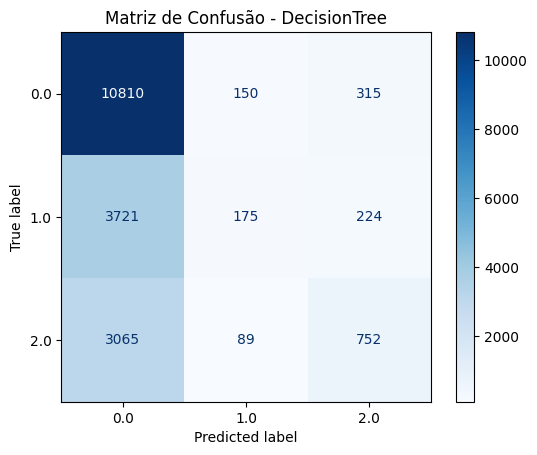

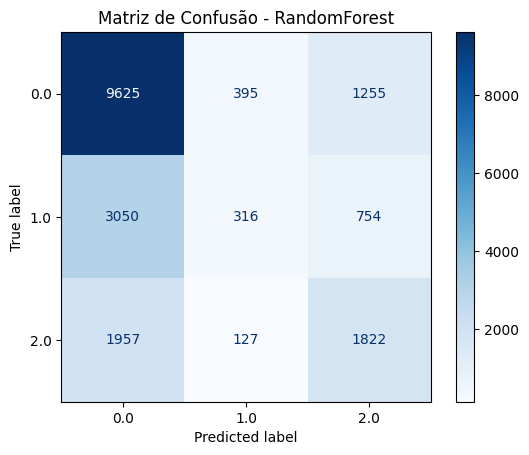

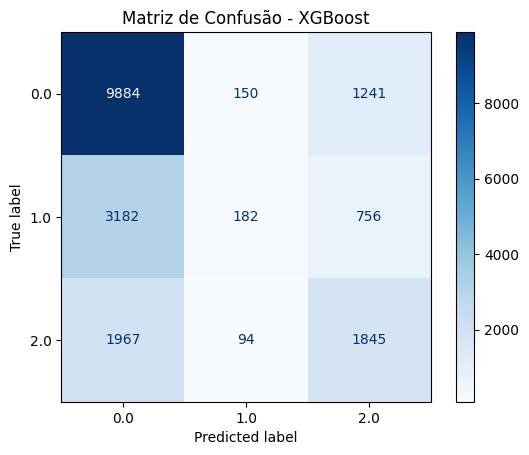

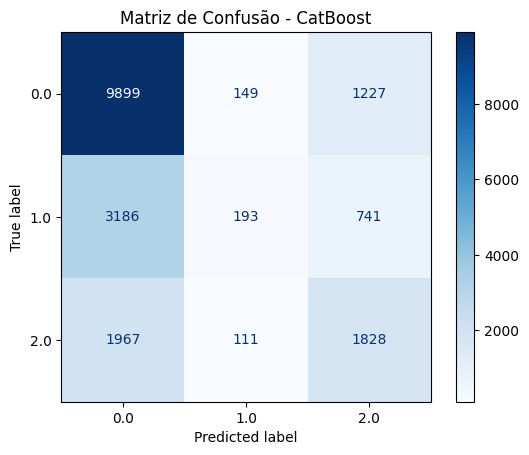

In [34]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

### 5. Análise da Importância das Features

In [35]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_test, y_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)

                      Feature  Importância  Desvio_Padrao        Modelo
0           pct_n_freq_escola     0.001523       0.000572  DecisionTree
1            pct_freq_publica     0.016828       0.001268  DecisionTree
2         pct_freq_particular     0.000078       0.000087  DecisionTree
3       pct_nunca_freq_escola     0.000000       0.000000  DecisionTree
4             pct_freq_creche     0.000523       0.000097  DecisionTree
5   adultos_nunca_freq_escola     0.034159       0.001582  DecisionTree
6         ideb_2017_municipio     0.004083       0.000629  DecisionTree
7                ideb_ausente     0.000000       0.000000  DecisionTree
8           pct_n_freq_escola     0.004922       0.000996  RandomForest
9            pct_freq_publica     0.052909       0.001274  RandomForest
10        pct_freq_particular     0.001824       0.000399  RandomForest
11      pct_nunca_freq_escola     0.001378       0.000445  RandomForest
12            pct_freq_creche     0.006321       0.000537  Rando

In [37]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,pct_n_freq_escola,0.001523,0.000572,DecisionTree
1,pct_freq_publica,0.016828,0.001268,DecisionTree
2,pct_freq_particular,0.000078,0.000087,DecisionTree
3,pct_nunca_freq_escola,0.000000,0.000000,DecisionTree
4,pct_freq_creche,0.000523,0.000097,DecisionTree


In [38]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

In [39]:
# Função para listar a categoria mais importante para cada feature diretamente
def listar_importancia_por_categoria(feature_importance_df):
    # Selecionar as colunas relevantes e criar uma cópia para melhor visualização
    categorias_importantes_df = feature_importance_df[['Feature', 'Importância', 'Modelo']].copy()
    
    # Ordenar as categorias por importância em ordem decrescente, para cada modelo
    categorias_importantes_df = categorias_importantes_df.sort_values(by=['Modelo', 'Importância'], ascending=[True, False])
    
    return categorias_importantes_df

# Executar a função para obter as importâncias de todas as features
categorias_importantes_df = listar_importancia_por_categoria(feature_importance_df)

# Visualizar as categorias com maiores importâncias de cada variável e modelo
print(categorias_importantes_df)

                      Feature  Importância        Modelo
25           pct_freq_publica     0.050085      CatBoost
30        ideb_2017_municipio     0.032807      CatBoost
29  adultos_nunca_freq_escola     0.024620      CatBoost
28            pct_freq_creche     0.006238      CatBoost
24          pct_n_freq_escola     0.004414      CatBoost
26        pct_freq_particular     0.002269      CatBoost
27      pct_nunca_freq_escola     0.002249      CatBoost
31               ideb_ausente     0.000026      CatBoost
5   adultos_nunca_freq_escola     0.034159  DecisionTree
1            pct_freq_publica     0.016828  DecisionTree
6         ideb_2017_municipio     0.004083  DecisionTree
0           pct_n_freq_escola     0.001523  DecisionTree
4             pct_freq_creche     0.000523  DecisionTree
2         pct_freq_particular     0.000078  DecisionTree
9            pct_freq_publica     0.052909  RandomForest
14        ideb_2017_municipio     0.034143  RandomForest
13  adultos_nunca_freq_escola  

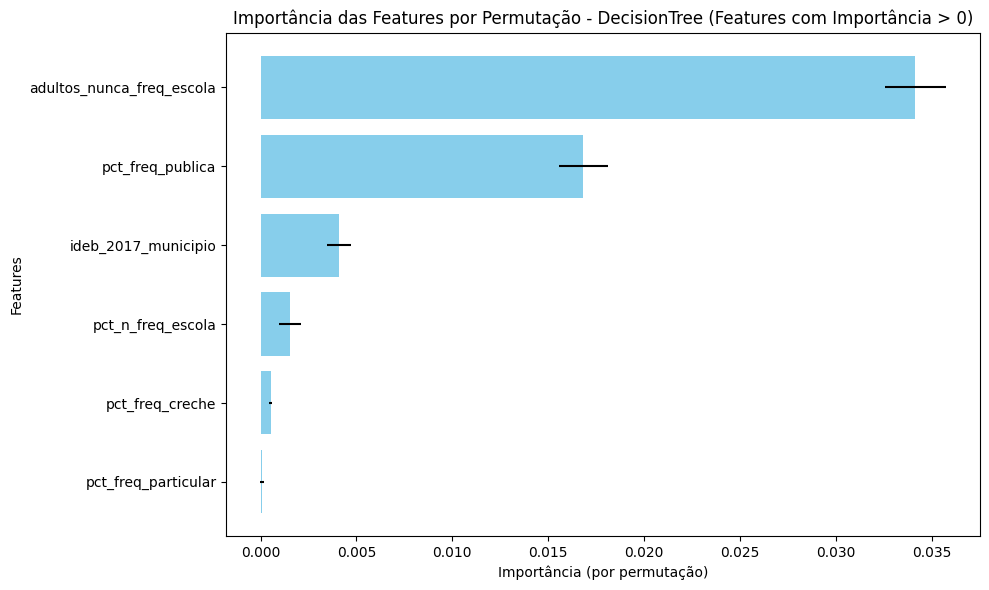

In [40]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df[feature_importance_df['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(10, 6))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

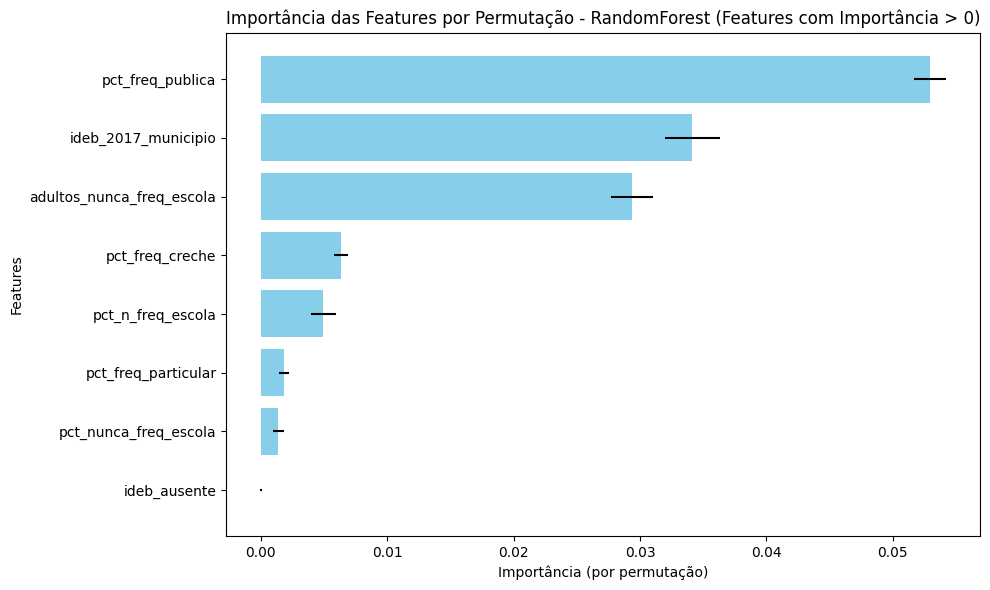

In [41]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 6))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

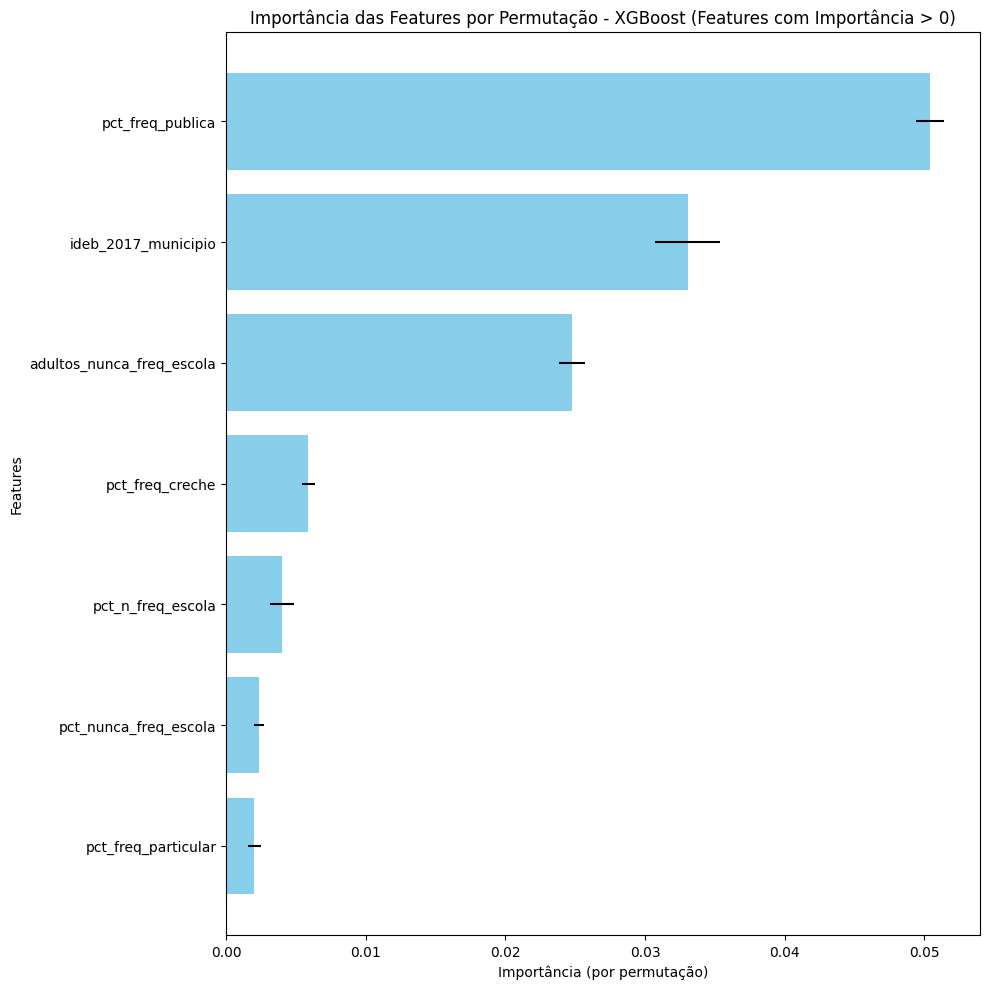

In [42]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 10))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

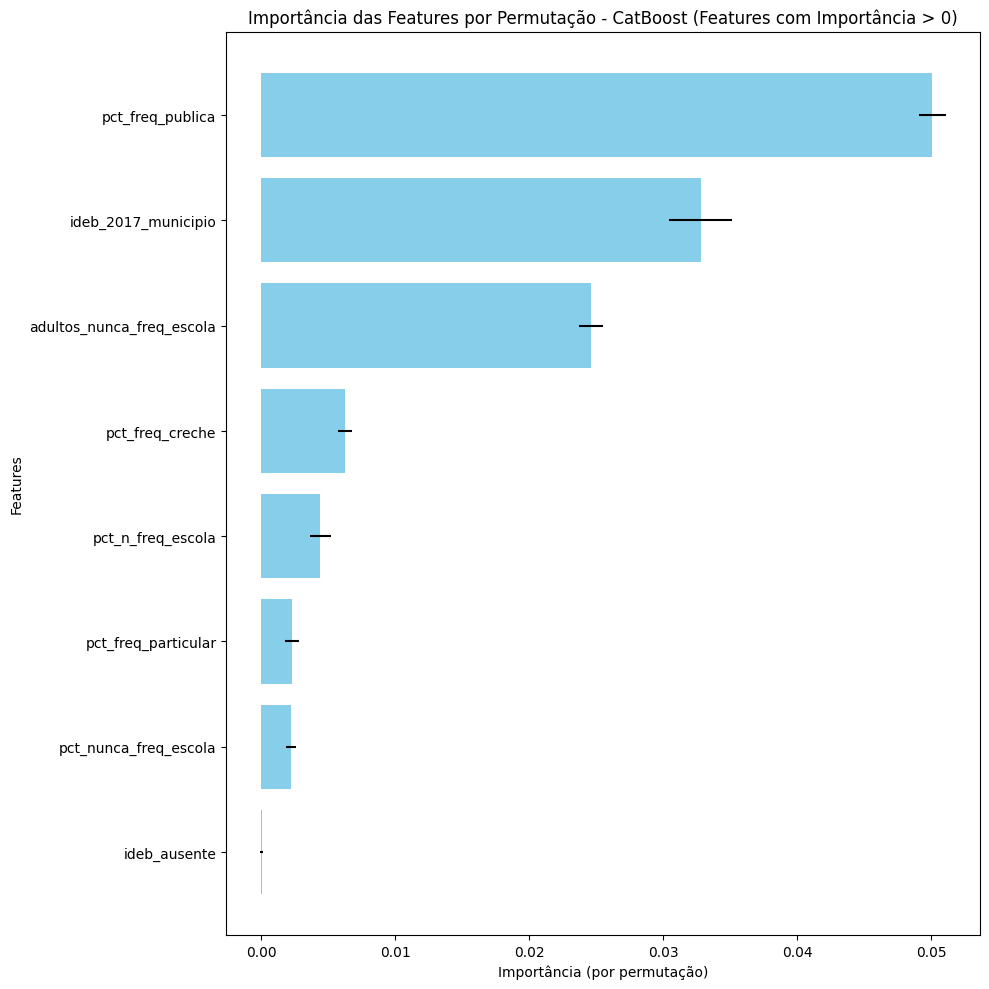

In [43]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 10))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [44]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                  Feature  Importância
adultos_nunca_freq_escola     0.034159
         pct_freq_publica     0.016828
      ideb_2017_municipio     0.004083
        pct_n_freq_escola     0.001523
          pct_freq_creche     0.000523
      pct_freq_particular     0.000078

Top 10 Features para o modelo RandomForest:

                  Feature  Importância
         pct_freq_publica     0.052909
      ideb_2017_municipio     0.034143
adultos_nunca_freq_escola     0.029330
          pct_freq_creche     0.006321
        pct_n_freq_escola     0.004922
      pct_freq_particular     0.001824
    pct_nunca_freq_escola     0.001378
             ideb_ausente     0.000005

Top 10 Features para o modelo XGBoost:

                  Feature  Importância
         pct_freq_publica     0.050412
      ideb_2017_municipio     0.033045
adultos_nunca_freq_escola     0.024740
          pct_freq_creche     0.005896
        pct_n_freq_escola     0.004005
    pct_n

## Avaliando o balanceamento das classes

In [45]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [46]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.584164
1.0    0.213436
2.0    0.202400
Name: proportion, dtype: float64


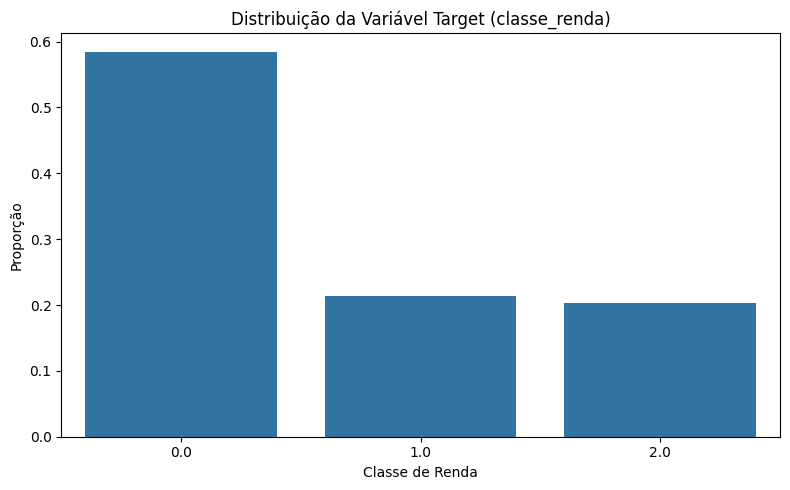

In [47]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [48]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    56373
1.0    20597
2.0    19532
Name: count, dtype: int64


### Balanceando as classes

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [50]:
# Primeiro, aplica-se o SMOTE para criar amostras sintéticas das classes minoritárias
# Depois, faz-se undersampling para reduzir a classe majoritária a um tamanho mais equilibrado
over = SMOTE(sampling_strategy={1.0: 35000, 2.0: 35000})  # Aumenta as classes 1 e 2 para 35k cada
under = RandomUnderSampler(sampling_strategy={0.0: 40000})  # Reduz a classe 0 para 40k

In [51]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [52]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [53]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    40000
1.0    35000
2.0    35000
Name: count, dtype: int64


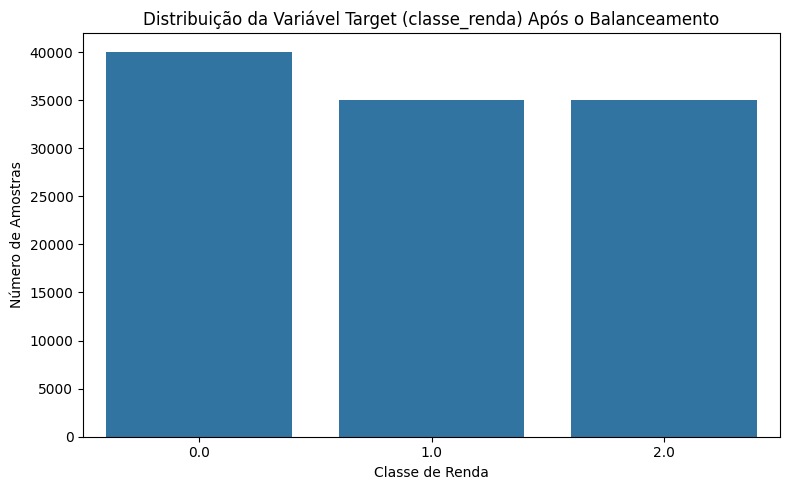

In [54]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Refazendo as análises dos modelos após balanceamento das classes

In [55]:
X_balanced.head()

,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_nunca_freq_escola,pct_freq_creche,adultos_nunca_freq_escola,ideb_2017_municipio,ideb_ausente
40597,0.0,0.333333,0.0,0.0,0.0,0.000000,0.544554,0
5460,0.0,0.000000,0.0,0.0,0.0,0.000000,0.742574,0
61479,0.0,0.000000,0.0,0.0,0.0,0.000000,0.514851,0
60116,0.0,0.000000,0.0,0.0,0.0,0.333333,0.752475,0
48990,0.0,0.000000,0.5,0.0,0.0,0.000000,0.693069,0


In [56]:
# Dividir os dados em treino e teste após balanceamento
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [57]:
# Definir os modelos e os parâmetros
models_balanced = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

In [58]:
# Criar um dicionário para armazenar os melhores modelos
best_models_balanced = {}

for model_name, model_info in models_balanced.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV usando as features e classes balanceadas
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_balanced_train, y_balanced_train)  # Usando dados balanceados
    
    # Armazenar o melhor modelo
    best_models_balanced[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name} (usando dados balanceados): {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree (usando dados balanceados): {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest (usando dados balanceados): {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost (usando dados balanceados): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost (usando dados balanceados): {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


In [59]:
# Avaliar todos os modelos usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usando dados de teste balanceados

    # Calcular F1 Score
    f1 = f1_score(y_balanced_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_balanced_test, y_pred)

    # Exibir os resultados
    print(f"Modelo (usando dados balanceados): {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo (usando dados balanceados): DecisionTree
  F1 Score: 0.51
  Acurácia: 0.53
Modelo (usando dados balanceados): RandomForest
  F1 Score: 0.53
  Acurácia: 0.55
Modelo (usando dados balanceados): XGBoost
  F1 Score: 0.53
  Acurácia: 0.54
Modelo (usando dados balanceados): CatBoost
  F1 Score: 0.53
  Acurácia: 0.55


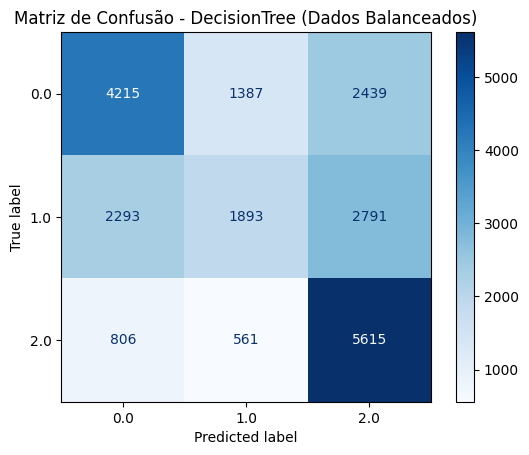

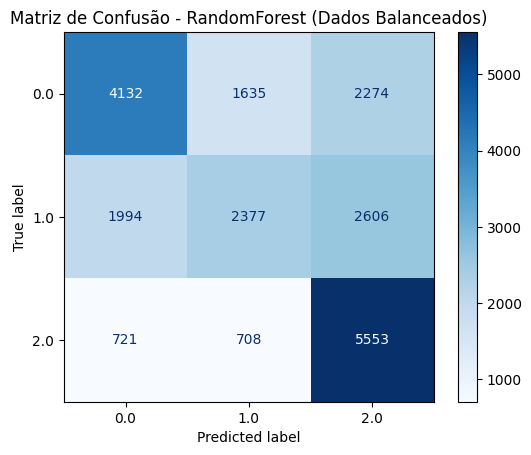

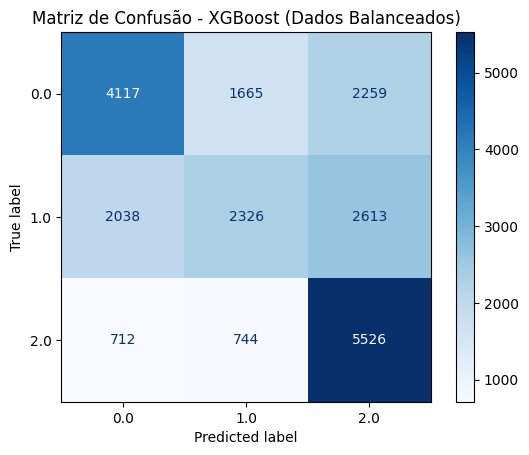

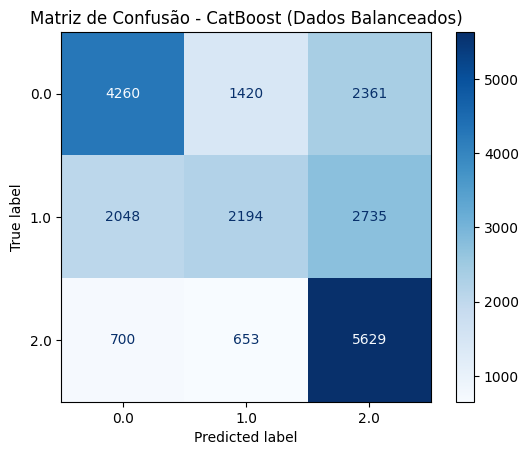

In [60]:
# Gerar matriz de confusão para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usar os dados de teste balanceados
    
    # Gerar a matriz de confusão
    ConfusionMatrixDisplay.from_estimator(model, X_balanced_test, y_balanced_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name} (Dados Balanceados)')
    plt.show()

### Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [61]:
# Inicializar um DataFrame para armazenar importâncias
feature_importance_df_balanced = pd.DataFrame()

In [62]:
# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_balanced_test, y_balanced_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_balanced_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []
all_importances.append(calcular_importancia(best_models['DecisionTree'], X_balanced_test, y_balanced_test, 'DecisionTree'))
all_importances.append(calcular_importancia(best_models['RandomForest'], X_balanced_test, y_balanced_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_balanced_test, y_balanced_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_balanced_test, y_balanced_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df_balanced = pd.concat(all_importances, ignore_index=True)

In [63]:
# Filtrar apenas as features com importância > 0
feature_importance_df_balanced = feature_importance_df_balanced[feature_importance_df_balanced['Importância'] > 0.0]

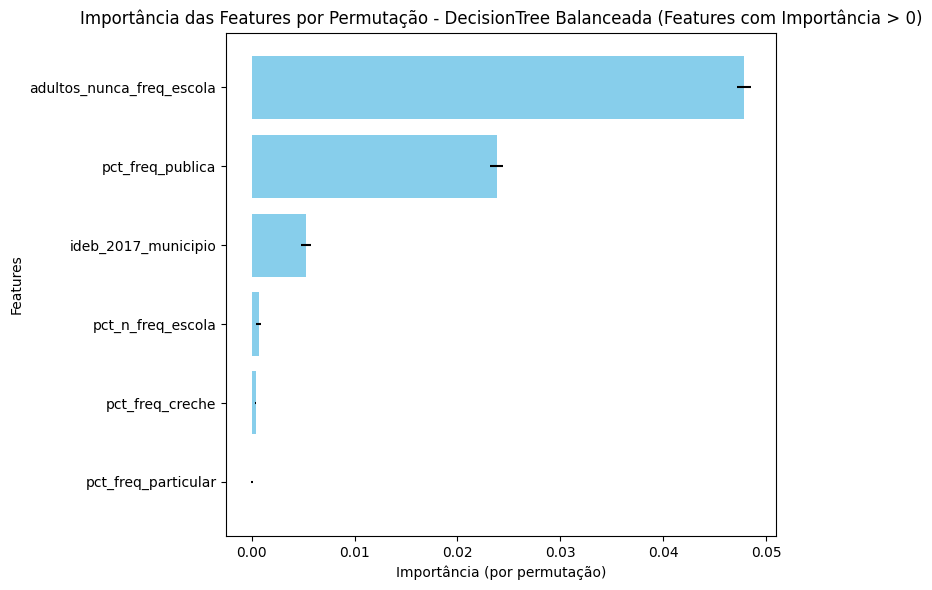

In [64]:
# Gerando um gráfico separado para cada modelo
# Filtrar e ordenar dados para o modelo DecisionTree
decision_tree_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'DecisionTree']
decision_tree_group = decision_tree_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo DecisionTree
plt.figure(figsize=(8, 6))
plt.barh(decision_tree_group['Feature'], decision_tree_group['Importância'], 
         xerr=decision_tree_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - DecisionTree Balanceada (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

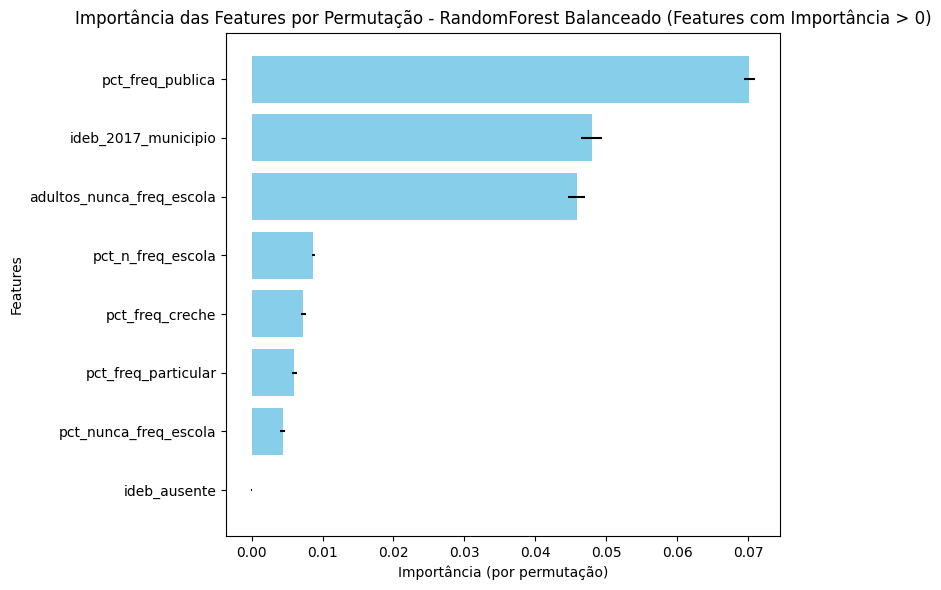

In [65]:
# Filtrar e ordenar dados para o modelo RandomForest Balanceado
random_forest_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(8, 6))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest Balanceado (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

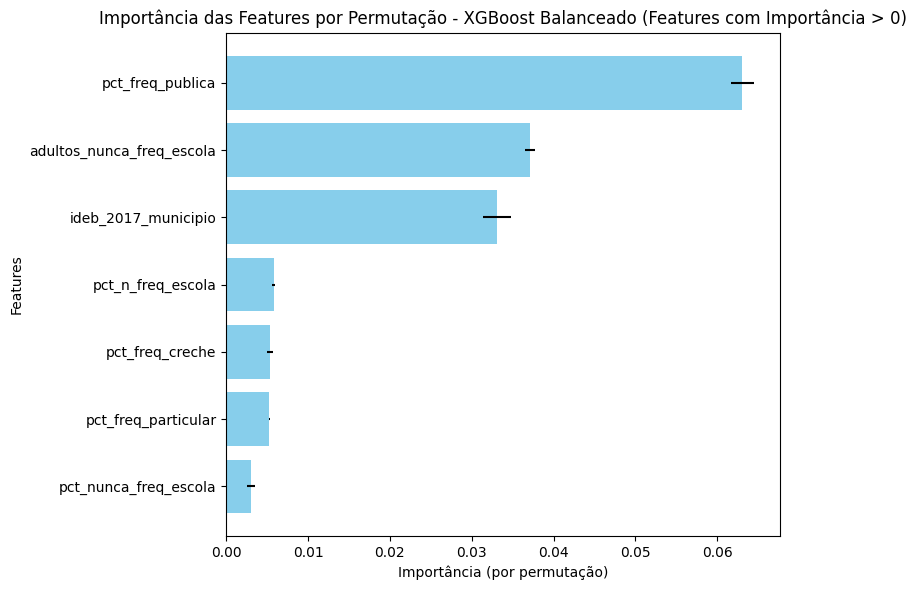

In [66]:
# Filtrar e ordenar dados para o modelo XGBoost Balanceado
xgboost_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(8, 6))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost Balanceado (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

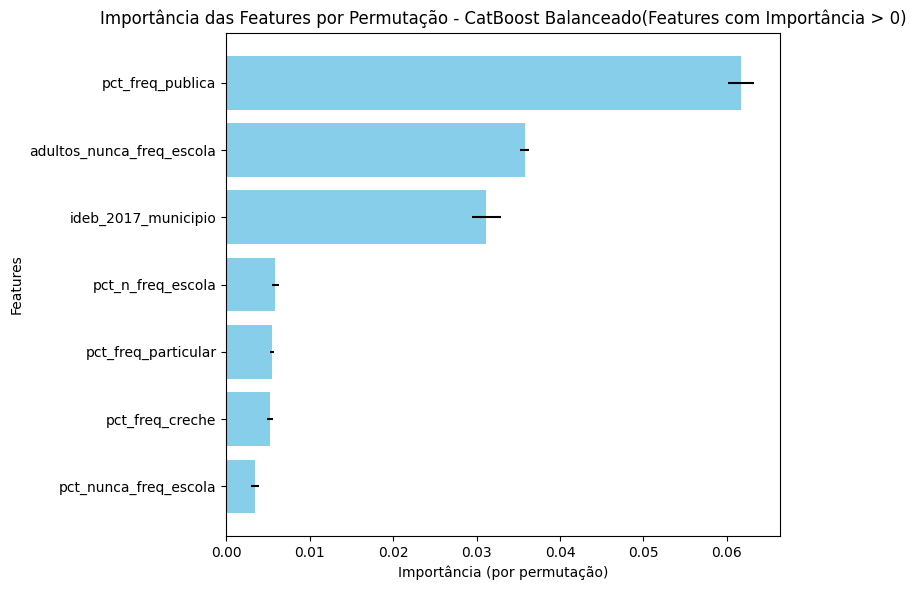

In [67]:
# Filtrar e ordenar dados para o modelo CatBoost Balanceado
catboost_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(8, 6))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost Balanceado(Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [68]:
# Lista para armazenar os 10 principais features de cada modelo balanceado
top_10_features_per_model_balanced = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df_balanced['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model_balanced[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name} balanceado:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree balanceado:

                  Feature  Importância
adultos_nunca_freq_escola     0.034159
         pct_freq_publica     0.016828
      ideb_2017_municipio     0.004083
        pct_n_freq_escola     0.001523
          pct_freq_creche     0.000523
      pct_freq_particular     0.000078

Top 10 Features para o modelo RandomForest balanceado:

                  Feature  Importância
         pct_freq_publica     0.052909
      ideb_2017_municipio     0.034143
adultos_nunca_freq_escola     0.029330
          pct_freq_creche     0.006321
        pct_n_freq_escola     0.004922
      pct_freq_particular     0.001824
    pct_nunca_freq_escola     0.001378
             ideb_ausente     0.000005

Top 10 Features para o modelo XGBoost balanceado:

                  Feature  Importância
         pct_freq_publica     0.050412
      ideb_2017_municipio     0.033045
adultos_nunca_freq_escola     0.024740
          pct_freq_creche     0.005896
        pct_n_f

## Comparando a performance antes e após o balanceamento

In [69]:
# Lista para armazenar as métricas de desempenho
performance_comparison = []

# Avaliar modelos antes do balanceamento
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score e Acurácia
    f1_before = f1_score(y_test, y_pred, average='macro')
    accuracy_before = accuracy_score(y_test, y_pred)
    
    # Armazenar os resultados antes do balanceamento
    performance_comparison.append({
        'Modelo': model_name,
        'F1 Score Antes do Balanceamento': f1_before,
        'Acurácia Antes do Balanceamento': accuracy_before,
        'F1 Score Após o Balanceamento': None,  # Inicializa como None
        'Acurácia Após o Balanceamento': None,  # Inicializa como None
    })

In [70]:
# Avaliar modelos após o balanceamento
for model_name, model in best_models_balanced.items():
    y_pred_balanced = model.predict(X_balanced_test)
    
    # Calcular F1 Score e Acurácia
    f1_balanced = f1_score(y_balanced_test, y_pred_balanced, average='macro')
    accuracy_after = accuracy_score(y_balanced_test, y_pred_balanced)
    
    # Adicionar os resultados após o balanceamento ao mesmo dicionário
    for entry in performance_comparison:
        if entry['Modelo'] == model_name:
            entry['F1 Score Após o Balanceamento'] = f1_balanced
            entry['Acurácia Após o Balanceamento'] = accuracy_after

In [71]:
# Criar DataFrame para as métricas de desempenho
performance_df = pd.DataFrame(performance_comparison)

# Exibir o DataFrame de desempenho
performance_df.head(10)

,Modelo,F1 Score Antes do Balanceamento,Acurácia Antes do Balanceamento,F1 Score Após o Balanceamento,Acurácia Após o Balanceamento
0,DecisionTree,0.371814,0.608103,0.509641,0.532864
1,RandomForest,0.447166,0.609450,0.533078,0.548273
2,XGBoost,0.435910,0.617118,0.528475,0.544045
3,CatBoost,0.437031,0.617585,0.530732,0.549227


In [72]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree:

                  Feature  Importância
adultos_nunca_freq_escola     0.034159
         pct_freq_publica     0.016828
      ideb_2017_municipio     0.004083
        pct_n_freq_escola     0.001523
          pct_freq_creche     0.000523
      pct_freq_particular     0.000078

Top 10 Features para o modelo RandomForest:

                  Feature  Importância
         pct_freq_publica     0.052909
      ideb_2017_municipio     0.034143
adultos_nunca_freq_escola     0.029330
          pct_freq_creche     0.006321
        pct_n_freq_escola     0.004922
      pct_freq_particular     0.001824
    pct_nunca_freq_escola     0.001378
             ideb_ausente     0.000005

Top 10 Features para o modelo XGBoost:

                  Feature  Importância
         pct_freq_publica     0.050412
      ideb_2017_municipio     0.033045
adultos_nunca_freq_escola     0.024740
          pct_freq_creche     0.005896
        pct_n_freq_escola     0.004005
    pct_n

In [73]:
# Lista para armazenar os 10 principais features de cada modelo balanceado
top_10_features_per_model_balanced = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df_balanced['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df_balanced[feature_importance_df_balanced['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model_balanced[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name} balanceado:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo DecisionTree balanceado:

                  Feature  Importância
adultos_nunca_freq_escola     0.034159
         pct_freq_publica     0.016828
      ideb_2017_municipio     0.004083
        pct_n_freq_escola     0.001523
          pct_freq_creche     0.000523
      pct_freq_particular     0.000078

Top 10 Features para o modelo RandomForest balanceado:

                  Feature  Importância
         pct_freq_publica     0.052909
      ideb_2017_municipio     0.034143
adultos_nunca_freq_escola     0.029330
          pct_freq_creche     0.006321
        pct_n_freq_escola     0.004922
      pct_freq_particular     0.001824
    pct_nunca_freq_escola     0.001378
             ideb_ausente     0.000005

Top 10 Features para o modelo XGBoost balanceado:

                  Feature  Importância
         pct_freq_publica     0.050412
      ideb_2017_municipio     0.033045
adultos_nunca_freq_escola     0.024740
          pct_freq_creche     0.005896
        pct_n_f

In [74]:
# Criar DataFrame para as features mais importantes antes e após o balanceamento
top_10_features_per_model = pd.concat(top_10_features_per_model, names=['Modelo', 'Índice']).reset_index()
top_10_features_per_model_balanced = pd.concat(top_10_features_per_model_balanced, names=['Modelo', 'Índice']).reset_index()

In [75]:
top_10_features_per_model.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,5,adultos_nunca_freq_escola,0.034159
1,DecisionTree,1,pct_freq_publica,0.016828
2,DecisionTree,6,ideb_2017_municipio,0.004083
3,DecisionTree,0,pct_n_freq_escola,0.001523
4,DecisionTree,4,pct_freq_creche,0.000523
5,DecisionTree,2,pct_freq_particular,0.000078
6,RandomForest,9,pct_freq_publica,0.052909
7,RandomForest,14,ideb_2017_municipio,0.034143
8,RandomForest,13,adultos_nunca_freq_escola,0.029330
9,RandomForest,12,pct_freq_creche,0.006321


In [76]:
top_10_features_per_model_balanced.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,5,adultos_nunca_freq_escola,4.786364e-02
1,DecisionTree,1,pct_freq_publica,2.381818e-02
2,DecisionTree,6,ideb_2017_municipio,5.272727e-03
3,DecisionTree,0,pct_n_freq_escola,6.666667e-04
4,DecisionTree,4,pct_freq_creche,3.939394e-04
5,DecisionTree,2,pct_freq_particular,6.060606e-05
6,RandomForest,9,pct_freq_publica,7.015152e-02
7,RandomForest,14,ideb_2017_municipio,4.792424e-02
8,RandomForest,13,adultos_nunca_freq_escola,4.580303e-02
9,RandomForest,8,pct_n_freq_escola,8.712121e-03


In [77]:
# Criar um DataFrame vazio para armazenar o resultado
combined_df = pd.DataFrame()

# Iterar sobre os modelos únicos
for modelo in top_10_features_per_model['Modelo'].unique():
    # Obter as 10 features mais importantes antes e após o balanceamento
    antes = top_10_features_per_model[top_10_features_per_model['Modelo'] == modelo].reset_index(drop=True)
    depois = top_10_features_per_model_balanced[top_10_features_per_model_balanced['Modelo'] == modelo].reset_index(drop=True)
    
    # Adicionar as features antes e depois ao DataFrame combinado
    for i in range(5):  # Para as 10 features mais importantes
        combined_df = pd.concat([combined_df, pd.DataFrame({
            'Modelo': modelo,
            'Feature Antes': antes['Feature'][i],
            'Importância Antes': antes['Importância'][i],
            'Feature Após': depois['Feature'][i],
            'Importância Após': depois['Importância'][i]
        }, index=[0])], ignore_index=True)

In [78]:
 combined_df.head(40)

,Modelo,Feature Antes,Importância Antes,Feature Após,Importância Após
0,DecisionTree,adultos_nunca_freq_escola,0.034159,adultos_nunca_freq_escola,0.047864
1,DecisionTree,pct_freq_publica,0.016828,pct_freq_publica,0.023818
2,DecisionTree,ideb_2017_municipio,0.004083,ideb_2017_municipio,0.005273
3,DecisionTree,pct_n_freq_escola,0.001523,pct_n_freq_escola,0.000667
4,DecisionTree,pct_freq_creche,0.000523,pct_freq_creche,0.000394
5,RandomForest,pct_freq_publica,0.052909,pct_freq_publica,0.070152
6,RandomForest,ideb_2017_municipio,0.034143,ideb_2017_municipio,0.047924
7,RandomForest,adultos_nunca_freq_escola,0.029330,adultos_nunca_freq_escola,0.045803
8,RandomForest,pct_freq_creche,0.006321,pct_n_freq_escola,0.008712
9,RandomForest,pct_n_freq_escola,0.004922,pct_freq_creche,0.007288


# Variáveis mais importantes no modelo CatBoost 

### 1. pct_freq_publica     0.050085
### 2. ideb_2017_municipio     0.032807
### 3. adultos_nunca_freq_escola     0.024620
### 4. pct_freq_creche     0.006238
### 5. pct_n_freq_escola     0.004414
### 6.  pct_freq_particular     0.002269
### 7.  pct_nunca_freq_escola     0.002249